# Visualizations

In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from html2text import html2text
from wordcloud import WordCloud, STOPWORDS


## Pandas Dataframes

We can use [django pandas](https://github.com/chrisdev/django-pandas) to create data frames from django models.

By overriding the default manager of a model with a `django_pandas.managers.DataFrameManager` you can use its `to_dataframe` method for creating data frames.

In [2]:
df = MeetupEvent.objects.filter(group__urlname="Django-Vienna").annotate(
    visitors=Count("attendants")
).order_by("event_date").to_dataframe(
    ["name", "venue", "visitors"], index="event_date"
)
df

,name,venue,visitors
event_date,,,
2013-09-11,First meetup of Vienna's Django developers.,Sektor5,11
2013-11-21,2nd Django Friends Meetup,Sektor5,21
2014-01-15,Django-Meetup-Vienna #3,Sektor5,12
2014-03-25,Django-Vienna 03/2014,Sektor5,15
2014-07-03,Django-Vienna 07/2014,Sektor5,17
2014-08-20,Django-Vienna 08/2014,Sektor5,14
2014-09-25,Django-Vienna 09/2014,Sektor5,21
2014-12-02,Django-Vienna 12/2014,Sektor5,15
2015-02-05,Django-Vienna 02/2015,Sektor5,18


With matplotlib installed it is very easy to generate charts from dataframes by calling their `plot` method

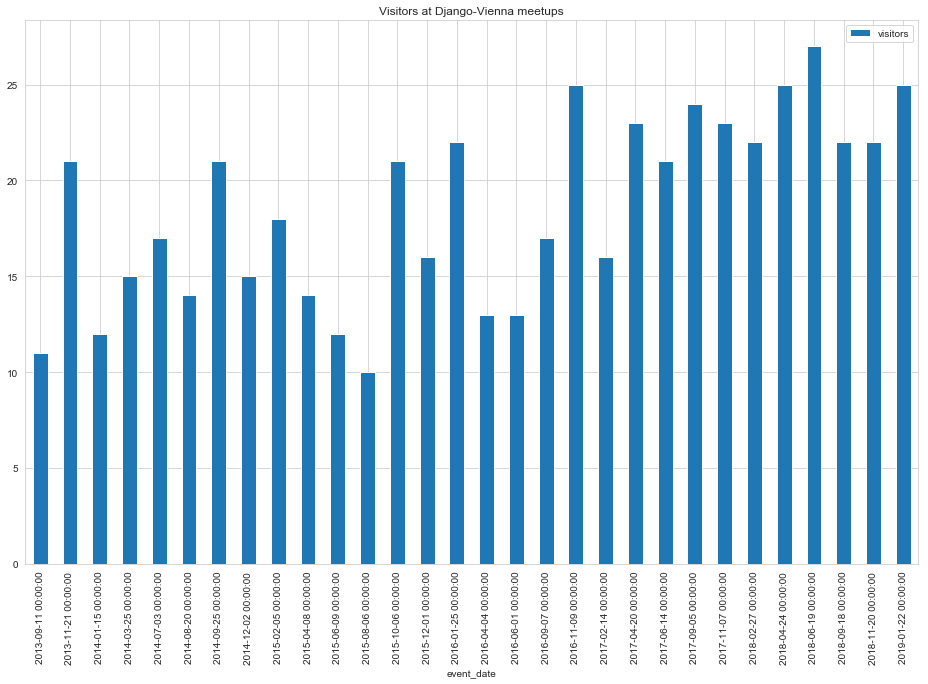

In [3]:
sns.set_style("whitegrid")
p = df.plot(kind="bar", figsize=(16,10), title="Visitors at Django-Vienna meetups")

## Creating word clouds

Lets create word clouds with [WordCloud](https://amueller.github.io/word_cloud/)

### A word cloud of most regular meetup participants

In [4]:
MeetupMember.objects.annotate(visits=Count("events")).values_list(
    "name", "visits"
).order_by("-visits").to_dataframe(["visits"], index="name").head(n=10)

,visits
name,
Anton Pirker,25
Florian Demmer,24
Benedikt Breinbauer,24
Stephan Pötschner,23
Clemens Pleban,23
Former member,20
Mark Burrett,12
Dražen Lučanin,12
Ashley Camba Garrido,11


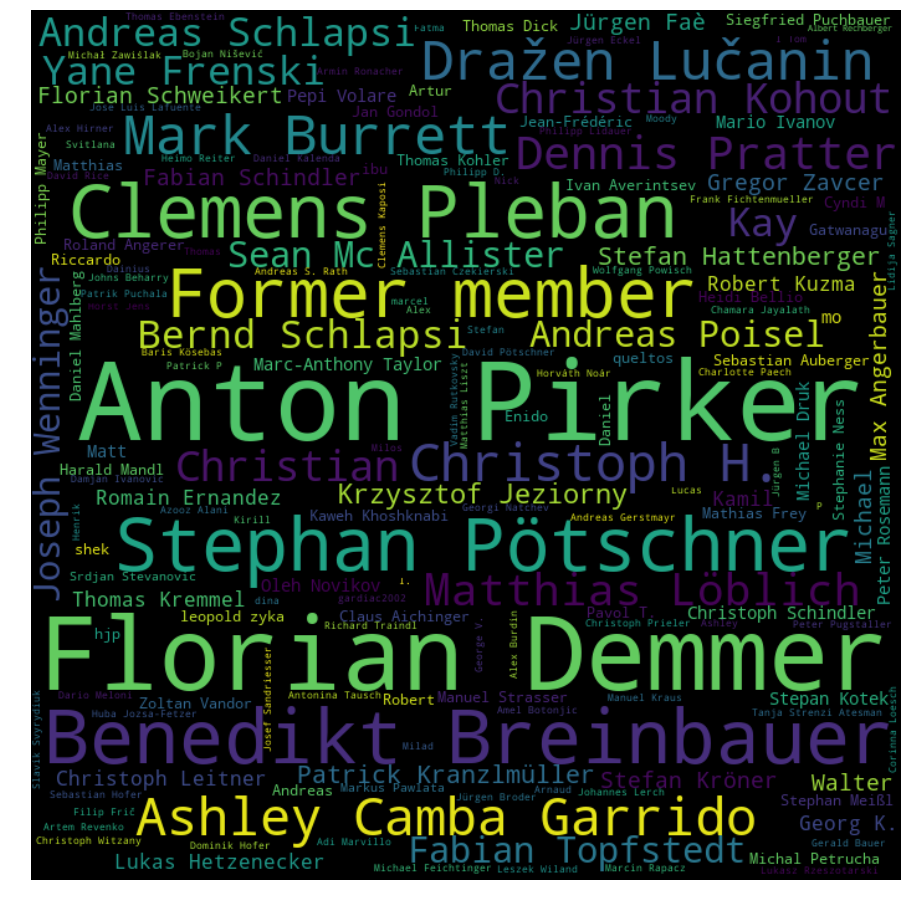

In [6]:
# create a dictionary with member names and their number of visits
frequencies = dict(MeetupMember.objects.annotate(visits=Count("events")).values_list("name", "visits"))

visitorcloud = WordCloud(width=700, height=700).fit_words(frequencies)

plt.figure(figsize=(16, 16))
plt.imshow(visitorcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### A word cloud of all words used in the event descriptions

In [8]:
grp = MeetupGroup.objects.get(urlname="Django-Vienna")
text = html2text(grp.description)

# create a text comprising the meetup group description + the description of all their events.
for event in grp.events.all():
    if event.description:
        text += " " + html2text(event.description)

# remove newlines and some characters
replace_patter = r"[\s~*!\?\\\[\]\(\)<>]+"
text = re.sub(replace_patter, " ", text)
text

'Hey Doing Django development and living in or around Vienna Meet fellow Django hackers: Hear about their best-practices, their daily work-arounds or simply relax together – having a drink. Despite the group name, Flask-users are highly welcome : Meetup every two months. Talks aimed at web developers with deadlines: Best-practices, your project\'s stack, elegant solutions : You can find notes and summaries from previous talks at https://github.com/stephanpoetschner/django-vienna . Use our mailing list django-vienna-list@meetup.com for contacting our group. You have to be group member and use your meetup-registration-email when directly contacting the list. For forwarding requests address one of the organizers. Django-related job offers are welcome in our our mailing list, too. django-entwickler.at provides a structured overview of Django- and Python- related companies in and around Vienna – freelancers, agencies or django- powered products http://django-entwickler.at/ . We meet again i

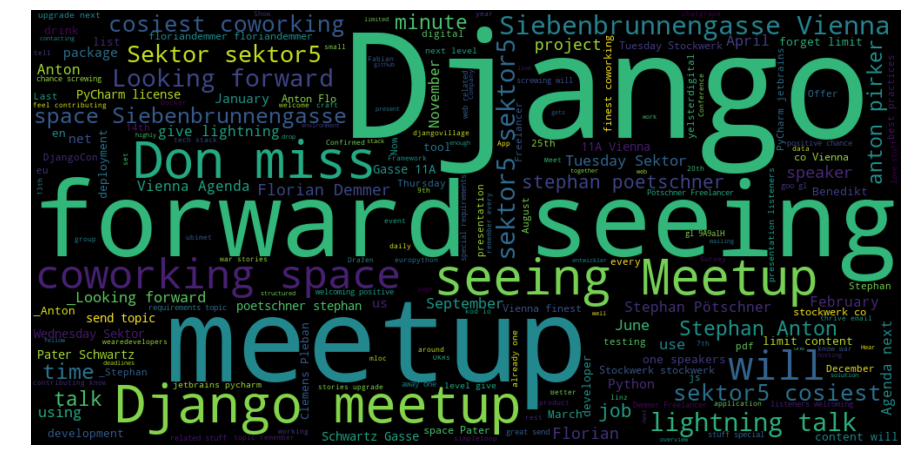

In [9]:
stopwords = {"https", "http"}

descriptions = WordCloud(
    width=1000, 
    height=500, 
    relative_scaling=.5, 
    stopwords=STOPWORDS | stopwords
).generate(text)

plt.figure(figsize=(16,8))
plt.imshow(descriptions, interpolation='bilinear')
plt.axis("off")
plt.show()